# A/B Test Analysis

A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

Below are all the features in the dataset:

-  Campaign Name: The name of the campaign
-  Date: Date of the record
-  Spend: Amount spent on the campaign in dollars
-  of Impressions: Number of impressions the ad crossed through the campaign
-  Reach: The number of unique impressions received in the ad
-  of Website Clicks: Number of website clicks received through the ads
-  of Searches: Number of users who performed searches on the website
-  of View Content: Number of users who viewed content and products on the website
-  of Add to Cart: Number of users who added products to the cart
-  of Purchase: Number of purchases


Two campaigns were performed by the company:
- Control Campaign
- Test Campaign

## 1. Preparing data

In [21]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
control_group_path = "data/control_group.csv"
test_group_path = "data/test_group.csv"

control_group_data = pd.read_csv(control_group_path, delimiter=";")
test_group_data = pd.read_csv(test_group_path, delimiter=";")

In [4]:
control_group_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_group_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


### Checking if dataset has any null values

In [6]:
print(test_group_data.isnull().values.any())
print(control_group_data.isnull().values.any())

False
True


In [12]:
control_group_data.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [13]:
control_group_data.isnull()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


#### Replacing null values with mean values

In [14]:
control_group_data['# of Impressions'].fillna(value=round(control_group_data['# of Impressions'].mean(), 2), inplace=True)
control_group_data['Reach'].fillna(control_group_data['Reach'].mean(), inplace=True)
control_group_data['# of Website Clicks'].fillna(control_group_data['# of Website Clicks'].mean(), inplace=True)
control_group_data['# of Searches'].fillna(control_group_data['# of Searches'].mean(), inplace=True)
control_group_data['# of View Content'].fillna(control_group_data['# of View Content'].mean(), inplace=True)
control_group_data['# of Add to Cart'].fillna(control_group_data['# of Add to Cart'].mean(), inplace=True)
control_group_data['# of Purchase'].fillna(control_group_data['# of Purchase'].mean(), inplace=True)

In [15]:
control_group_data = control_group_data.round(0)
control_group_data

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,109560.0,88845.0,5321.0,2221.0,1944.0,1300.0,523.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


# Metrics

- CTR Click trough rate
- CR Conversion Rate
- CPC cost per click
- CPA Cost Per Acquisition

In [15]:
control_group_data['CTR'] = control_group_data['# of Website Clicks']/control_group_data['# of Impressions']
control_group_data['CR'] = control_group_data['# of Purchase']/control_group_data['# of Website Clicks']
control_group_data['CPC'] = control_group_data['Spend [USD]']/control_group_data['# of Website Clicks']
control_group_data['CPA'] = control_group_data['Spend [USD]']/control_group_data['# of Purchase']

test_group_data['CTR'] = test_group_data['# of Website Clicks']/test_group_data['# of Impressions']
test_group_data['CR'] = test_group_data['# of Purchase']/test_group_data['# of Website Clicks']
test_group_data['CPC'] = test_group_data['Spend [USD]']/test_group_data['# of Website Clicks']
test_group_data['CPA'] = test_group_data['Spend [USD]']/test_group_data['# of Purchase']

In [17]:
# join datasets
ab_data = control_group_data.merge(test_group_data, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
ab_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CTR,CR,CPC,CPA
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,0.324971,3.689320
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,0.076814,0.083937,0.990125,11.796078
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,0.085478,0.033846,0.343385,10.145455
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0.019358,0.322354,0.943786,2.927793
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,0.044839,0.178133,0.645333,3.622754


#### Compering data

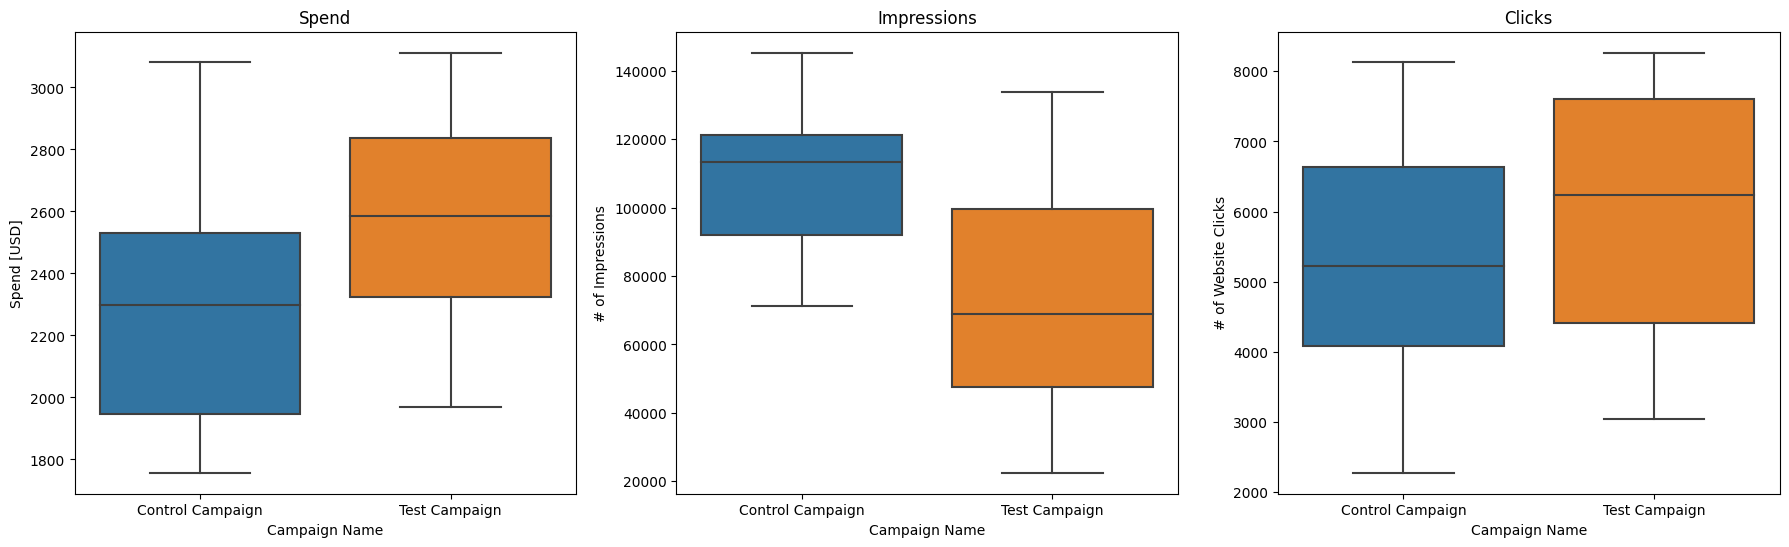

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(22,6))


ax1 = sns.boxplot(x="Campaign Name", y="Spend [USD]", data=ab_data, ax=ax[0])
ax2 = sns.boxplot(x="Campaign Name", y="# of Impressions", data=ab_data, ax=ax[1])
ax3 = sns.boxplot(x="Campaign Name", y="# of Website Clicks", data=ab_data, ax=ax[2])

ax1.set_title('Spend')
ax2.set_title('Impressions')
ax3.set_title('Clicks')

plt.show()

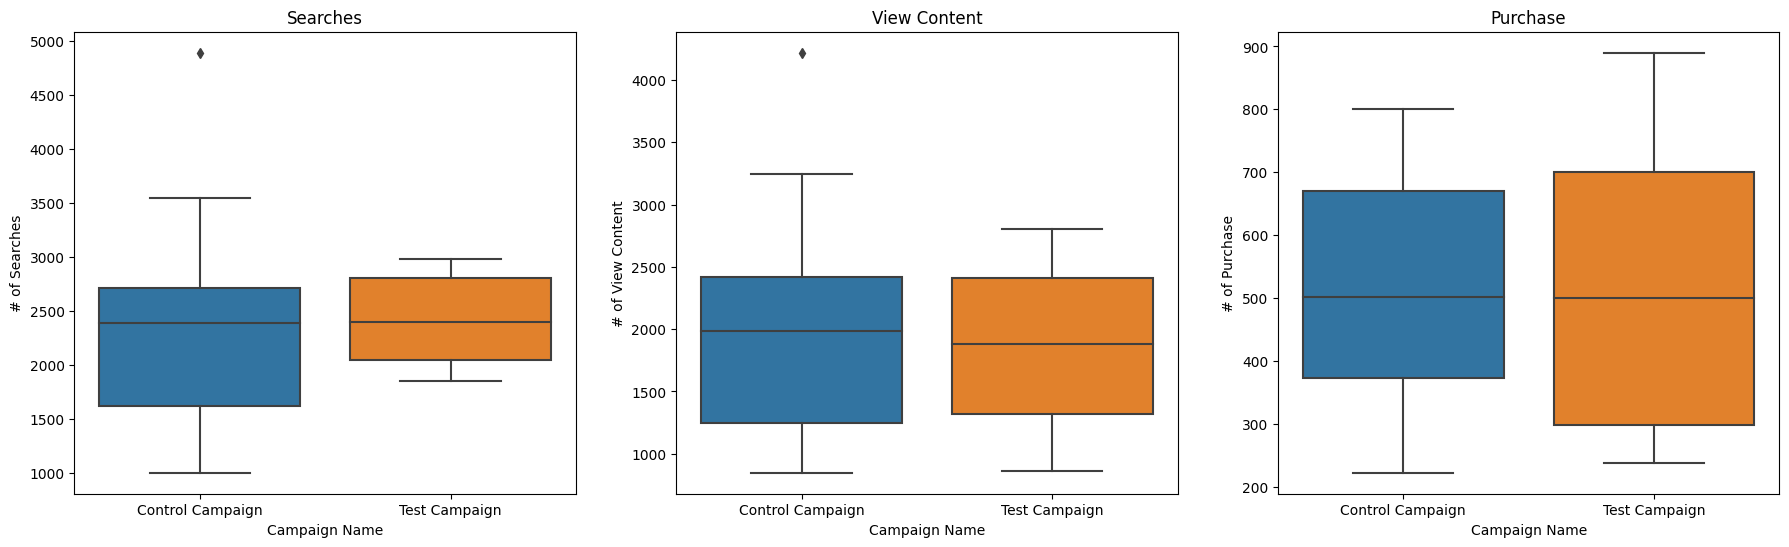

In [13]:
fig2, ax2 = plt.subplots(ncols=3, figsize=(22,6))

ax4 = sns.boxplot(x="Campaign Name", y="# of Searches", data=ab_data, ax=ax2[0])
ax5 = sns.boxplot(x="Campaign Name", y="# of View Content", data=ab_data, ax=ax2[1])
ax6 = sns.boxplot(x="Campaign Name", y="# of Purchase", data=ab_data, ax=ax2[2])

ax4.set_title('Searches')
ax5.set_title('View Content')
ax6.set_title('Purchase')

plt.show()

#### Metrics Analysis

C:\Users\zhmas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


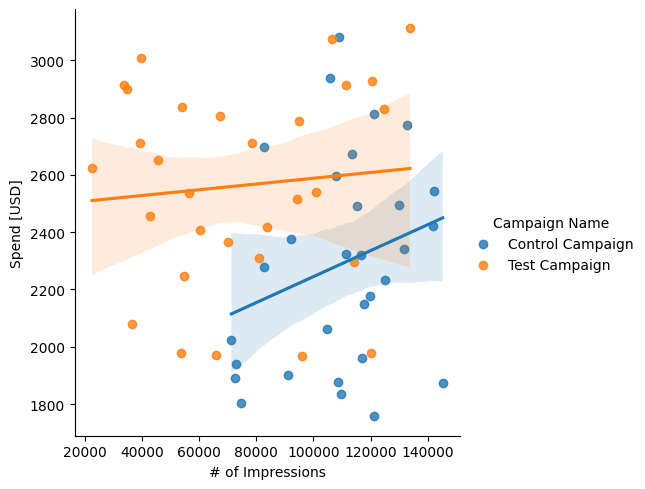

In [36]:
sns.lmplot(x='# of Impressions', y='Spend [USD]', data=ab_data, hue='Campaign Name')

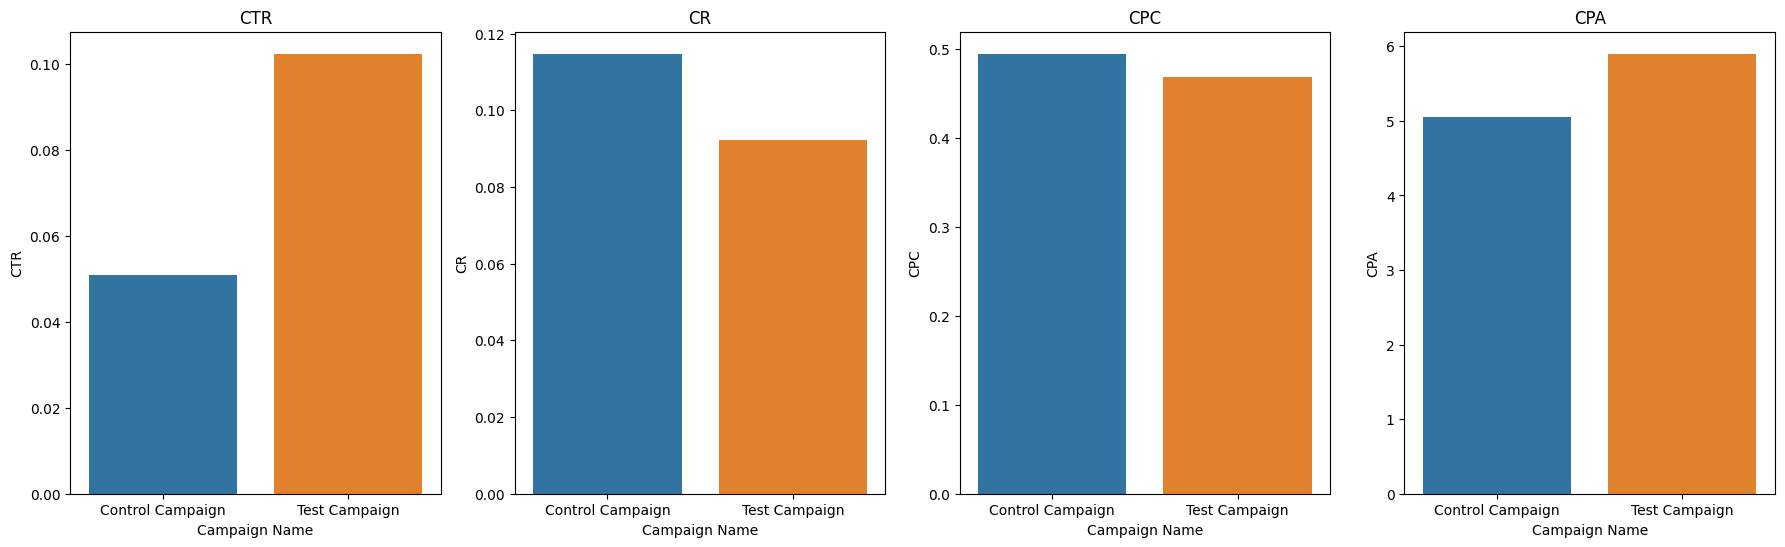

In [19]:
fig3, ax3 = plt.subplots(ncols=4, figsize=(22,6))
ax7 = sns.barplot(data=ab_data, x='Campaign Name', y='CTR', errorbar=('ci', False), ax=ax3[0], estimator='mean')
ax8 = sns.barplot(data=ab_data, x='Campaign Name', y='CR', errorbar=('ci', False), ax=ax3[1], estimator='mean')
ax9 = sns.barplot(data=ab_data, x='Campaign Name', y='CPC', errorbar=('ci', False), ax=ax3[2], estimator='mean')
ax10 = sns.barplot(data=ab_data, x='Campaign Name', y='CPA', errorbar=('ci', False), ax=ax3[3], estimator='mean')

ax7.set_title('CTR')
ax8.set_title('CR')
ax9.set_title('CPC')
ax10.set_title('CPA')

plt.show()

In [23]:
# Function to calculate confidence interval, where measures A and B are the numerator and denominator for the metric
def ratio_diff_confidence_interval(control, test, metric, measure_a, measure_b, alpha):
    p_pool = (control[measure_a].sum() + test[measure_a].sum())/(control[measure_b].sum() + test[measure_b].sum())
    pool_se = np.sqrt(p_pool * (1-p_pool) * (1/control[measure_b].sum() + 1/test[measure_b].sum()))

    metric_diff = (test[measure_a].sum()/test[measure_b].sum()) - (control[measure_a].sum()/control[measure_b].sum())
    margin_of_error = stats.norm.ppf(1-alpha/2) * pool_se

    ci_lower_bound = metric_diff - margin_of_error
    ci_upper_bound = metric_diff + margin_of_error

    print(f"The difference in {metric} between groups is {round(metric_diff, 4)}")
    print(f"Confidence Interval: [{round(ci_lower_bound, 4)},{round(ci_upper_bound, 4)}]")
    print()
    if (ci_lower_bound > 0) or (ci_upper_bound < 0):
        print('Reject Null Hypothesis, statistically significant difference between Control and Test {}'.format(metric))
    else:
        print('Unable to reject Null Hypothesis, no statistically significant difference between Control and Test {}'.format(metric))
        
    
def cont_diff_confidence_interval(control, test, metric, alpha):
    se = np.sqrt((control[metric].std()**2/control[metric].count() + test[metric].std()**2/test[metric].count()))

    metric_diff = test[metric].mean() - control[metric].mean()
    margin_of_error = stats.norm.ppf(1-alpha/2) * se

    ci_lower_bound = metric_diff - margin_of_error
    ci_upper_bound = metric_diff + margin_of_error

    print(f"The difference in {metric} between groups is {round(metric_diff, 4)}")
    print(f"Confidence Interval: [{round(ci_lower_bound, 4)},{round(ci_upper_bound, 4)}]")
    print()
    if (ci_lower_bound > 0) or (ci_upper_bound < 0):
        print('Reject Null Hypothesis, statistically significant difference between Control and Test {}'.format(metric))
    else:
        print('Unable to reject Null Hypothesis, no statistically significant difference between Control and Test {}'.format(metric))

CTR

In [24]:
ratio_diff_confidence_interval(
                    control=control_group_data,
                    test=test_group_data,
                    metric='CTR', 
                    measure_a='# of Website Clicks', 
                    measure_b='# of Impressions', 
                    alpha=.05)

The difference in CTR between groups is 0.0323
The difference in CTR between groups is 0.0323
Confidence Interval: [0.0319,0.0327]

Reject Null Hypothesis, statistically significant difference between Control and Test CTR
